In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных

In [6]:
df_reg = pd.read_csv(r"../../data/trip_duration_processed.csv", index_col=0)

In [7]:
df_reg.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
0,1,-73.953918,40.778873,-73.963875,40.771164,1,2,16,0.012592,400,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,5,3,23,0.037371,1100,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,7,2,17,0.072712,1635,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,2,1,9,0.021473,1141,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,3,2,6,0.043264,848,1,0


In [8]:
df_cl = pd.read_csv(r"../../data/airlines_label_encoding.csv", index_col=0)

In [9]:
df_cl.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,305,3036,144,58,4,1195,131.0,0
1,298,315,84,218,7,707,145.0,0
2,219,6673,265,204,5,499,42.0,1
3,303,3668,229,218,2,810,70.0,1
4,17,623,162,226,5,985,143.0,0


In [10]:
scaler = StandardScaler()

In [11]:
Xreg = scaler.fit_transform(df_reg.drop(columns=["trip_duration"], axis=1))
yreg = df_reg["trip_duration"]
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, test_size=0.2)

In [12]:
X_reg_columns = df_reg.drop(columns=["trip_duration"], axis=1).columns

In [13]:
X_reg_df = pd.DataFrame(Xreg, columns=X_reg_columns)
X_reg_df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,vendor_id_1,vendor_id_2
0,-0.501716,0.408370,1.077872,0.221459,0.675661,-1.564399,-0.895954,0.366816,-0.693608,-0.933466,0.933466
1,0.261671,-0.132694,-0.873781,-0.260826,-2.165347,0.483984,-0.300381,1.467456,0.887547,1.071276,-1.071276
2,0.261671,-0.274322,-1.299653,0.468977,0.815550,1.508176,-0.895954,0.524050,3.142706,-0.933466,0.933466
3,3.315216,0.286426,0.284732,0.332288,1.028370,-1.052303,-1.491527,-0.733825,-0.126936,-0.933466,0.933466
4,-0.501716,-0.585902,-1.837523,-0.158220,-0.462221,-0.540208,-0.895954,-1.205528,1.263624,1.071276,-1.071276


In [14]:
Xcl = scaler.fit_transform(df_cl.drop(columns=["Delay"], axis=1))
ycl = df_cl["Delay"]
Xcl_train, Xcl_test, ycl_train, ycl_test = train_test_split(Xcl, ycl, test_size=0.2)

In [15]:
ycl_train.value_counts()

Delay
0    127844
1     65539
Name: count, dtype: int64

In [16]:
ros = RandomOverSampler(random_state=42)
Xcl_train, ycl_train = ros.fit_resample(Xcl_train, ycl_train)

In [17]:
ycl_train.value_counts()

Delay
0    127844
1    127844
Name: count, dtype: int64

In [18]:
X_cl_columns = df_cl.drop(columns=["Delay"], axis=1).columns

In [19]:
X_cl_df = pd.DataFrame(Xcl, columns=X_cl_columns)
X_cl_df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,1.089090,0.184922,-0.084845,-1.107767,0.026878,1.416132,0.199428
1,1.026570,-1.080713,-0.805113,0.813464,1.610116,-0.343451,0.469419
2,0.320987,1.876621,1.367695,0.645356,0.554624,-1.093437,-1.516939
3,1.071227,0.478888,0.935534,0.813464,-1.028615,0.027936,-0.976958
4,-1.483160,-0.937451,0.131235,0.909526,0.554624,0.658934,0.430848


# 1. VarianceThreshold

In [20]:
from sklearn.feature_selection import VarianceThreshold

## Датасет регрессии

In [21]:
X_reg_df.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,vendor_id_1,vendor_id_2
count,6.439330e+05,6.439330e+05,6.439330e+05,6.439330e+05,6.439330e+05,6.439330e+05,6.439330e+05,6.439330e+05,6.439330e+05,6.439330e+05,6.439330e+05
mean,-1.143166e-17,-3.063942e-14,-1.746084e-12,9.182741e-14,4.717412e-14,6.488239e-18,1.165731e-16,3.828944e-18,-7.344620e-16,8.344229e-17,5.980656e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.017155e-01,-7.543880e+02,-1.392792e+02,-7.490595e+02,-1.253500e+02,-1.564399e+00,-1.491527e+00,-2.148934e+00,-1.496899e+00,-9.334665e-01,-1.071276e+00
25%,-5.017155e-01,-1.939063e-01,-5.922877e-01,-2.126808e-01,-5.642946e-01,-1.052303e+00,-8.959538e-01,-7.338246e-01,-7.380786e-01,-9.334665e-01,-1.071276e+00
50%,-5.017155e-01,-3.715610e-02,5.615693e-02,-4.321979e-02,6.250703e-02,-2.811174e-02,-3.003811e-01,5.234715e-02,-2.765277e-01,-9.334665e-01,9.334665e-01
75%,2.616708e-01,1.578815e-01,6.123503e-01,1.760547e-01,6.003139e-01,9.960799e-01,8.907642e-01,8.385189e-01,4.693489e-01,1.071276e+00,9.334665e-01
max,3.315216e+00,1.396342e+01,2.087194e+01,1.383733e+01,1.877742e+01,1.508176e+00,1.486337e+00,1.467456e+00,3.460551e+00,1.071276e+00,9.334665e-01


In [22]:
vt1 = VarianceThreshold(threshold=1)

In [23]:
Xreg_vt = vt1.fit_transform(X_reg_df)
pd.DataFrame(Xreg_vt, columns=vt1.get_feature_names_out()).head()

,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_hour,vendor_id_1,vendor_id_2
0,1.077872,0.221459,0.675661,0.366816,-0.933466,0.933466
1,-0.873781,-0.260826,-2.165347,1.467456,1.071276,-1.071276
2,-1.299653,0.468977,0.815550,0.524050,-0.933466,0.933466
3,0.284732,0.332288,1.028370,-0.733825,-0.933466,0.933466
4,-1.837523,-0.158220,-0.462221,-1.205528,1.071276,-1.071276


## Датасет классификации

In [24]:
X_cl_df.describe()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
count,2.417290e+05,2.417290e+05,2.417290e+05,2.417290e+05,2.417290e+05,2.417290e+05,2.417290e+05
mean,-4.397370e-17,3.844760e-17,1.515564e-16,-6.459373e-17,-1.162246e-16,1.763651e-18,1.302162e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.634994e+00,-1.226766e+00,-1.789478e+00,-1.780198e+00,-1.556361e+00,-2.856626e+00,-2.326910e+00
25%,-8.579605e-01,-8.514010e-01,-8.051125e-01,-7.955671e-01,-1.028615e+00,-8.446438e-01,-7.841081e-01
50%,2.763302e-01,-2.788187e-01,9.522199e-02,8.099473e-02,2.687755e-02,-2.614938e-02,-2.055574e-01
75%,1.071227e+00,6.877336e-01,8.274940e-01,8.374796e-01,5.546236e-01,8.392192e-01,6.044137e-01
max,1.124815e+00,2.406876e+00,1.883887e+00,1.894157e+00,1.610116e+00,2.295923e+00,3.034327e+00


In [25]:
vt2 = VarianceThreshold(threshold=1)

In [26]:
Xcl_vt = vt2.fit_transform(X_cl_df)
pd.DataFrame(Xcl_vt, columns=vt2.get_feature_names_out()).head()

,AirportFrom,AirportTo,DayOfWeek,Time
0,-0.084845,-1.107767,0.026878,1.416132
1,-0.805113,0.813464,1.610116,-0.343451
2,1.367695,0.645356,0.554624,-1.093437
3,0.935534,0.813464,-1.028615,0.027936
4,0.131235,0.909526,0.554624,0.658934


## Вывод: данный способ позволяет выбрать только те признаки, дисперсия которых выше, чем параметр threshold. Тем самым менее информативные признаки с меньшей дисперсией удаляются

# 2. SelectKBest

In [27]:
from sklearn.feature_selection import SelectKBest

## Датасет регрессии

In [28]:
skb1 = SelectKBest(k=3)

In [29]:
Xreg_skb = skb1.fit_transform(X_reg_df, yreg)
pd.DataFrame(Xreg_skb, columns=skb1.get_feature_names_out()).head()

,pickup_latitude,dropoff_latitude,distance
0,1.077872,0.675661,-0.693608
1,-0.873781,-2.165347,0.887547
2,-1.299653,0.815550,3.142706
3,0.284732,1.028370,-0.126936
4,-1.837523,-0.462221,1.263624


## Датасет классификации

In [30]:
skb2 = SelectKBest(k=2)

In [31]:
Xcl_skb = skb2.fit_transform(X_cl_df, ycl)
pd.DataFrame(Xcl_skb, columns=skb2.get_feature_names_out()).head()

,Flight,Time
0,0.184922,1.416132
1,-1.080713,-0.343451
2,1.876621,-1.093437
3,0.478888,0.027936
4,-0.937451,0.658934


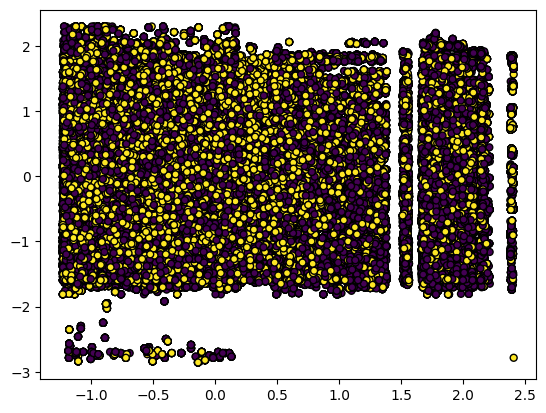

In [40]:
plt.scatter(Xcl_skb[:,0], Xcl_skb[:,1], edgecolor="k", s=25, c=ycl)

## Вывод: данный способ определяет k признаков, которые наиболее сильно влияют на целевую переменную. По умолчанию оценка происходит с помощью теста Фишера

# 3. RFE

In [35]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVR, LinearSVC

## Датасет регрессии

In [36]:
svr = LinearSVR()
rfe1 = RFE(svr, n_features_to_select=2, step=1)

In [37]:
Xreg_rfe = rfe1.fit_transform(X_reg_df, yreg)

In [38]:
pd.DataFrame(Xreg_rfe, columns=rfe1.get_feature_names_out()).head()

,dropoff_longitude,distance
0,0.221459,-0.693608
1,-0.260826,0.887547
2,0.468977,3.142706
3,0.332288,-0.126936
4,-0.158220,1.263624


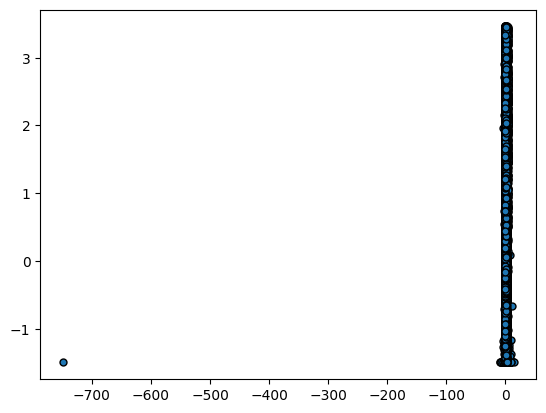

In [39]:
plt.scatter(Xreg_rfe[:,0], Xreg_rfe[:,1], edgecolor="k", s=25)

## Датасет классификации

In [42]:
svc = LinearSVC()
rfe2 = RFE(svc, n_features_to_select=3, step=1)

In [43]:
Xcl_rfe = rfe2.fit_transform(X_cl_df, ycl)

In [44]:
pd.DataFrame(Xcl_rfe, columns=rfe2.get_feature_names_out()).head()

,Airline,Flight,Time
0,1.089090,0.184922,1.416132
1,1.026570,-1.080713,-0.343451
2,0.320987,1.876621,-1.093437
3,1.071227,0.478888,0.027936
4,-1.483160,-0.937451,0.658934


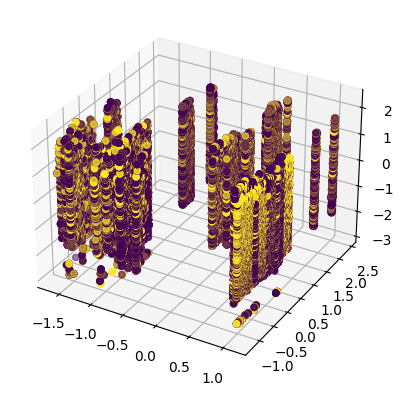

In [45]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xcl_rfe[:,0], Xcl_rfe[:,1], Xcl_rfe[:,2], c=ycl);

## Вывод: данный метод обучает множество моделей на всё меньшем и меньшем количестве признаков. Признаки отбиратются по значимости (модели SVM и DT хранят эту информацию)

# 4. PCA

In [46]:
from sklearn.decomposition import PCA

## Датасет регрессии

In [115]:
pca1 = PCA(n_components=3)

In [116]:
Xreg_pca = pca1.fit_transform(X_reg_df)
pd.DataFrame(Xreg_pca, columns=pca1.get_feature_names_out()).head()

,pca0,pca1,pca2
0,1.249168,-1.004963,1.243752
1,-1.625427,1.231369,-1.537653
2,-0.154123,-1.371123,-1.663480
3,1.064164,-2.293755,0.471945
4,-1.540891,1.527183,-1.365770


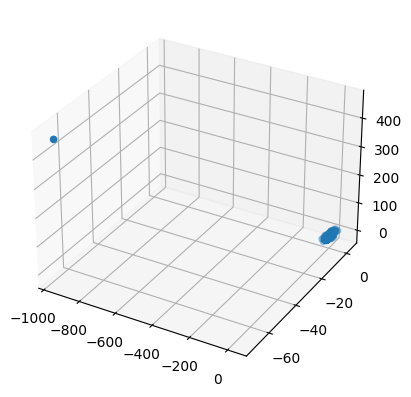

In [117]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xreg_pca[:,0], Xreg_pca[:,1], Xreg_pca[:,2]);

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('pca', PCA()),
    ('svr', LinearSVR())
])

param_grid = {
    'pca__n_components': np.arange(2, 5, 1)
}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_cl_df, ycl)

print("Лучшее число компонент:", grid.best_params_)

Лучшее число компонент: {'pca__n_components': 2}


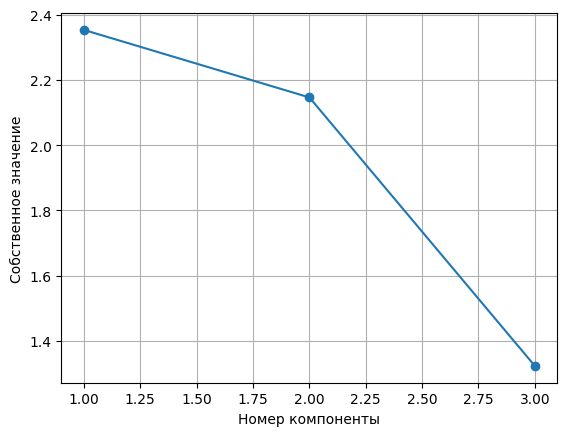

In [118]:
var = pca1.explained_variance_

plt.plot(range(1, len(var)+1), var, marker="o")
plt.xlabel("Номер компоненты")
plt.ylabel("Собственное значение")
plt.grid(True)
plt.show()

## Датасет классификации

In [119]:
pca2 = PCA(n_components=3)

In [120]:
Xcl_pca = pca2.fit_transform(X_cl_df)
pd.DataFrame(Xcl_pca, columns=pca2.get_feature_names_out()).head()

,pca0,pca1,pca2
0,-0.455185,-0.125205,0.630085
1,0.607314,0.960939,0.114790
2,-2.237465,0.762931,-1.487468
3,-1.439859,1.266667,0.272541
4,1.334932,-0.075897,0.825404


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('pca', PCA()),
    ('svc', LinearSVC())
])

param_grid = {
    'pca__n_components': np.arange(2, 5, 1)
}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_cl_df, ycl)

print("Лучшее число компонент:", grid.best_params_)

Лучшее число компонент: {'pca__n_components': 2}


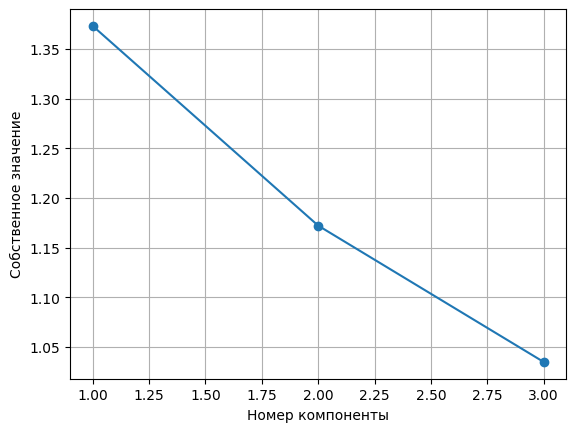

In [121]:
var2 = pca2.explained_variance_

plt.plot(range(1, len(var2)+1), var2, marker="o")
plt.xlabel("Номер компоненты")
plt.ylabel("Собственное значение")
plt.grid(True)
plt.show()

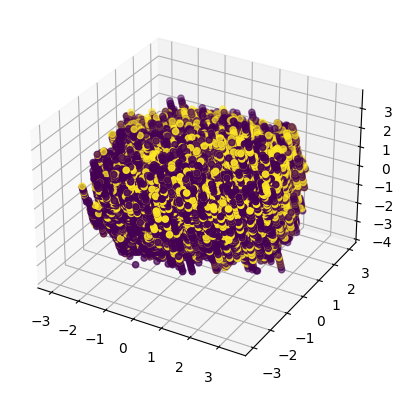

In [123]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xcl_pca[:,0], Xcl_pca[:,1], Xcl_pca[:,2], c=ycl);

# 5. KernelPCA

In [54]:
from sklearn.decomposition import KernelPCA

## Датасет регрессии

### Poly Kernel

In [55]:
n = 20000

In [56]:
pca1_poly = KernelPCA(kernel="poly", degree=3, n_components=2, n_jobs=-1)

In [57]:
Xreg_pca_poly = pca1_poly.fit_transform(X_reg_df[:n])

In [58]:
pd.DataFrame(Xreg_pca_poly, columns=pca1_poly.get_feature_names_out()).head()

,kernelpca0,kernelpca1
0,0.347805,-0.626421
1,-0.729147,1.092722
2,0.571256,0.535729
3,2.329000,-0.421590
4,-0.874076,0.851840


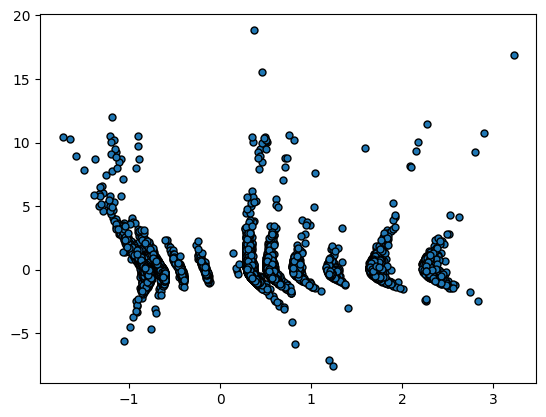

In [59]:
plt.scatter(Xreg_pca_poly[:,0], Xreg_pca_poly[:,1], edgecolor="k", s=25)

### Rbf Kernel

In [60]:
pca1_rbf = KernelPCA(kernel="rbf", n_components=2, n_jobs=-1)

In [61]:
Xreg_pca_rbf = pca1_rbf.fit_transform(X_reg_df[:n])

In [62]:
pd.DataFrame(Xreg_pca_rbf, columns=pca1_rbf.get_feature_names_out()).head()

,kernelpca0,kernelpca1
0,-0.306876,0.467898
1,0.217341,-0.380242
2,-0.146653,-0.284025
3,-0.214307,-0.181991
4,0.238180,-0.329434


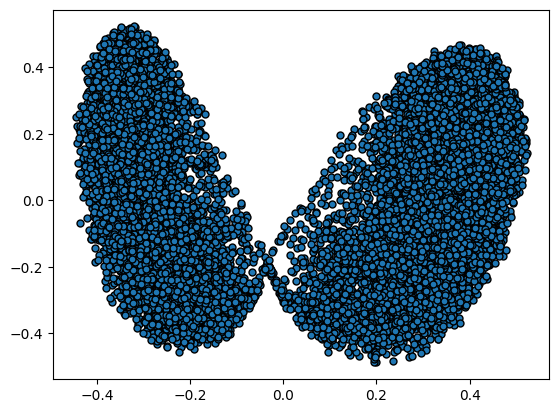

In [63]:
plt.scatter(Xreg_pca_rbf[:,0], Xreg_pca_rbf[:,1], edgecolor="k", s=25)

### Sigmoid Kernel

In [65]:
pca1_sigm = KernelPCA(kernel="sigmoid", n_components=2, n_jobs=-1)

In [66]:
Xreg_pca_sigm = pca1_sigm.fit_transform(X_reg_df[:n])

In [67]:
pd.DataFrame(Xreg_pca_sigm, columns=pca1_sigm.get_feature_names_out()).head()

,kernelpca0,kernelpca1
0,0.245641,-0.300830
1,-0.294556,0.430280
2,0.285765,0.211538
3,0.415904,-0.182026
4,-0.342091,0.352318


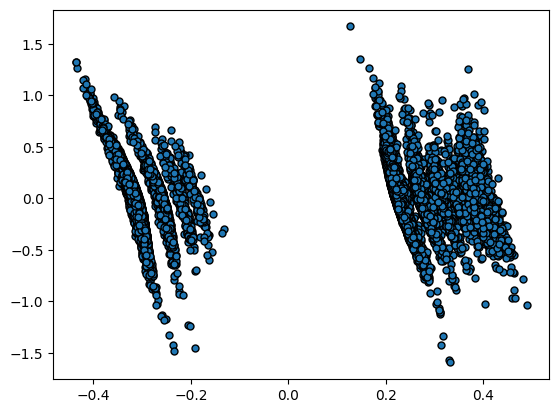

In [68]:
plt.scatter(Xreg_pca_sigm[:,0], Xreg_pca_sigm[:,1], edgecolor="k", s=25)

## Датасет классификации

### Poly Kernel

In [69]:
n = 20000

In [70]:
pca2_poly = KernelPCA(kernel="poly", degree=3, n_components=2, n_jobs=-1)

In [71]:
Xcl_pca_poly = pca2_poly.fit_transform(X_cl_df[:n])

In [72]:
pd.DataFrame(Xcl_pca_poly, columns=pca2_poly.get_feature_names_out()).head()

,kernelpca0,kernelpca1
0,-0.411437,-0.073814
1,0.145907,0.605864
2,-1.530674,0.694644
3,-0.925290,0.854067
4,0.879610,-0.158050


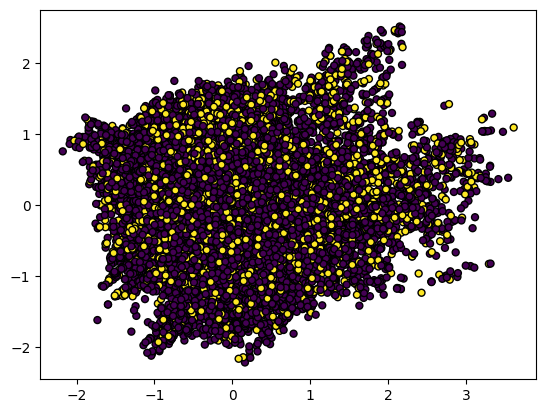

In [74]:
plt.scatter(Xcl_pca_poly[:,0], Xcl_pca_poly[:,1], edgecolor="k", s=25, c=ycl[:n])

### Rbf Kernel

In [76]:
pca2_rbf = KernelPCA(kernel="rbf", n_components=2, n_jobs=-1)

In [77]:
Xcl_pca_rbf = pca2_rbf.fit_transform(X_cl_df[:n])

In [78]:
pd.DataFrame(Xcl_pca_rbf, columns=pca2_rbf.get_feature_names_out()).head()

,kernelpca0,kernelpca1
0,-0.190428,0.164115
1,-0.116323,-0.207193
2,-0.254574,0.102607
3,-0.485511,-0.062374
4,0.391421,-0.191804


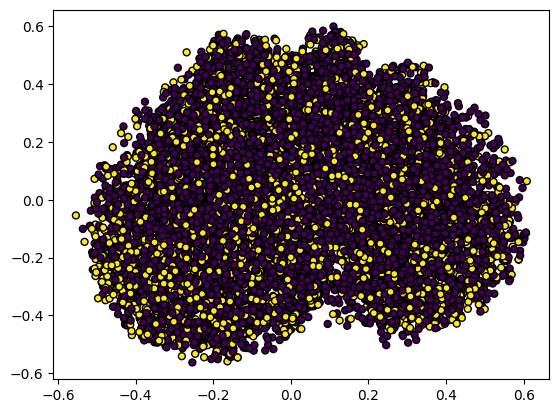

In [79]:
plt.scatter(Xcl_pca_rbf[:,0], Xcl_pca_rbf[:,1], edgecolor="k", s=25, c=ycl[:n])

### Sigmoid Kernel

In [80]:
pca2_sigm = KernelPCA(kernel="sigmoid", n_components=2, n_jobs=-1)

In [81]:
Xcl_pca_sigm = pca2_sigm.fit_transform(X_cl_df[:n])

In [82]:
pd.DataFrame(Xcl_pca_sigm, columns=pca2_sigm.get_feature_names_out()).head()

,kernelpca0,kernelpca1
0,-0.170997,0.094371
1,0.091317,-0.208163
2,-0.542162,-0.196127
3,-0.427612,-0.265904
4,0.304211,-0.014542


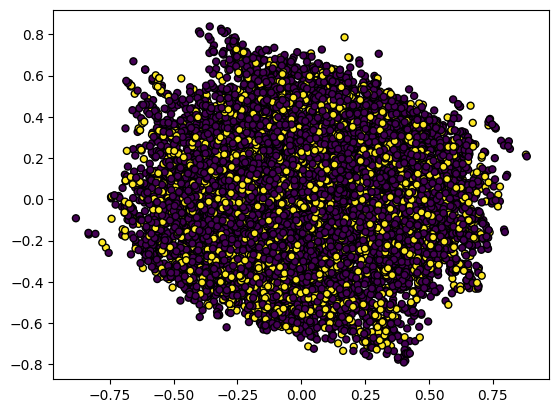

In [83]:
plt.scatter(Xcl_pca_sigm[:,0], Xcl_pca_sigm[:,1], edgecolor="k", s=25, c=ycl[:n])

# 6. t-SNE

In [84]:
from sklearn.manifold import TSNE

## Датасет регрессии

In [85]:
tsne1 = TSNE(n_components=2, n_jobs=-1)

In [86]:
Xreg_tsne = tsne1.fit_transform(X_reg_df[:n])

In [87]:
pd.DataFrame(Xreg_tsne, columns=tsne1.get_feature_names_out()).head()

,tsne0,tsne1
0,-35.095936,75.302284
1,19.866587,-62.987617
2,-59.094543,-22.294111
3,-98.266129,-39.183968
4,63.961281,-13.318903


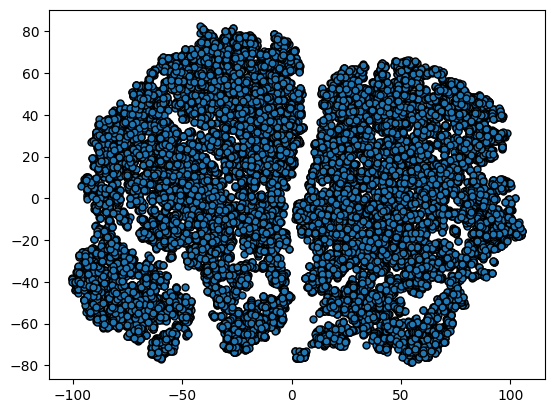

In [88]:
plt.scatter(Xreg_tsne[:,0], Xreg_tsne[:,1], edgecolor="k", s=25)

## Датасет классификации

In [89]:
tsne2 = TSNE(n_components=2, n_jobs=-1)

In [90]:
Xcl_tsne = tsne2.fit_transform(X_cl_df[:n])

In [91]:
pd.DataFrame(Xcl_tsne, columns=tsne2.get_feature_names_out()).head()

,tsne0,tsne1
0,0.570255,44.327957
1,-22.259224,28.623569
2,-82.464020,-39.131031
3,-82.301743,66.312340
4,82.086159,-14.662417


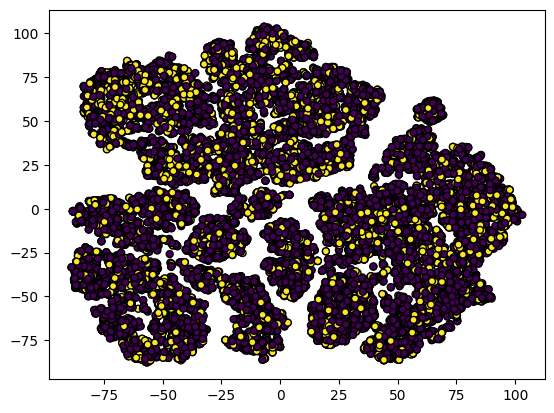

In [92]:
plt.scatter(Xcl_tsne[:,0], Xcl_tsne[:,1], edgecolor="k", s=25, c=ycl[:n])

# 7. Isomap

In [93]:
from sklearn.manifold import Isomap

## Датасет регрессии

In [94]:
iso1 = Isomap(n_components=2, n_jobs=-1)

In [95]:
Xreg_iso = iso1.fit_transform(X_reg_df[:n])

In [96]:
pd.DataFrame(Xreg_iso, columns=iso1.get_feature_names_out()).head()

,isomap0,isomap1
0,-8.808841,-2.814239
1,10.071714,2.648619
2,-12.679920,2.082154
3,-12.032601,-1.807408
4,12.477658,0.350399


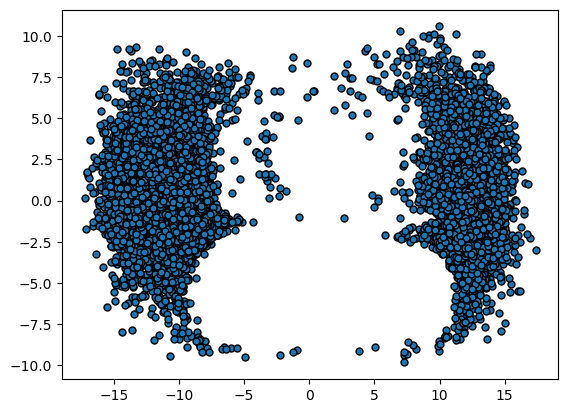

In [97]:
plt.scatter(Xreg_iso[:,0], Xreg_iso[:,1], edgecolor="k", s=25)

## Датасет классификации

In [98]:
iso2 = Isomap(n_components=2, n_jobs=-1)

In [99]:
Xcl_iso = iso2.fit_transform(X_cl_df[:n])

In [100]:
pd.DataFrame(Xcl_iso, columns=iso2.get_feature_names_out()).head()

,isomap0,isomap1
0,-5.808773,-1.220178
1,-7.116320,-1.372111
2,-2.515405,3.546159
3,-5.174831,-2.234580
4,6.417491,-3.143319


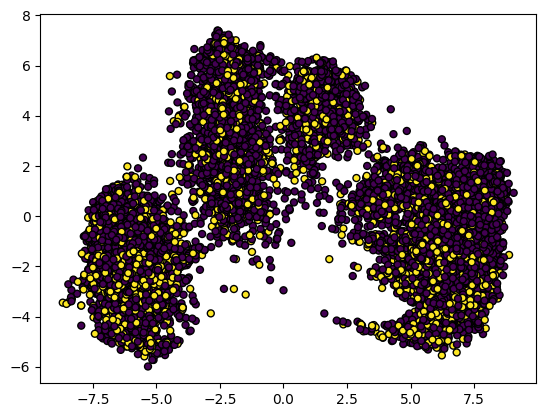

In [101]:
plt.scatter(Xcl_iso[:,0], Xcl_iso[:,1], edgecolor="k", s=25, c=ycl[:n])

# 8. UMAP

In [102]:
from umap import UMAP

## Датасет регрессии

In [103]:
umap1 = UMAP(n_components=2, n_jobs=-1)

In [104]:
Xreg_umap = umap1.fit_transform(X_reg_df[:n])

D:\MachineLearning\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [105]:
pd.DataFrame(Xreg_umap, columns=umap1.get_feature_names_out()).head()

,umap_component_1,umap_component_2
0,10.047269,-2.425309
1,-1.370139,-0.568114
2,12.149553,0.789547
3,10.066012,9.662794
4,1.520127,2.422355


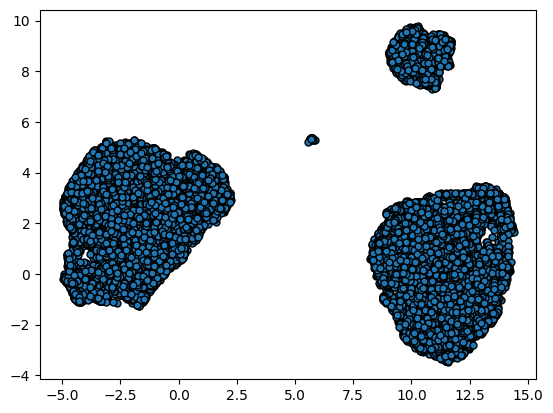

In [106]:
plt.scatter(Xreg_umap[:,0], Xreg_umap[:,1], edgecolor="k", s=25)

## Датасет классификации

In [107]:
umap2 = UMAP(n_components=2, n_jobs=-1)

In [108]:
Xcl_umap = umap2.fit_transform(X_cl_df[:n])

D:\MachineLearning\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [109]:
pd.DataFrame(Xcl_umap, columns=umap2.get_feature_names_out()).head()

,umap_component_1,umap_component_2
0,-2.725141,8.451065
1,0.243281,10.720230
2,2.015496,-1.268642
3,-3.477359,12.656526
4,10.384225,10.791731


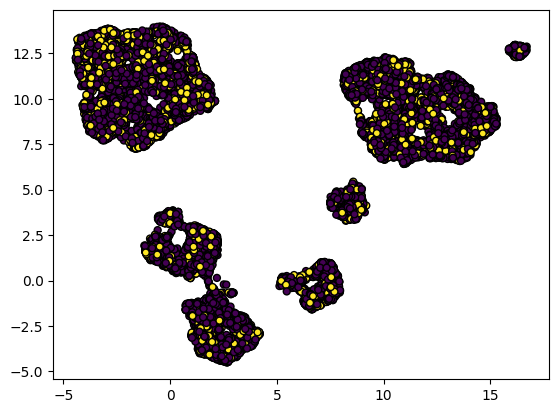

In [110]:
plt.scatter(Xcl_umap[:,0], Xcl_umap[:,1], edgecolor="k", s=25, c=ycl[:n])

# Обучаем модели на данных после понижения размерности

## Регрессия: Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

In [83]:
def print_regression_scores(y_true, y_pred):
    print("MSE:", round(mean_squared_error(y_true, y_pred), 2))
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("MAPE", round(mean_absolute_percentage_error(y_true, y_pred), 2))
    print("RMSE:", round(root_mean_squared_error(y_true, y_pred), 2))
    print("R2:", round(r2_score(y_true, y_pred), 2))
    return [round(mean_squared_error(y_true, y_pred), 2), round(mean_absolute_error(y_true, y_pred), 2), round(mean_absolute_percentage_error(y_true, y_pred), 2), round(root_mean_squared_error(y_true, y_pred), 2), round(r2_score(y_true, y_pred), 2)]

### До понижения размерности

In [84]:
lr1 = LinearRegression().fit(Xreg_train, yreg_train)

In [85]:
pred_reg_test = lr1.predict(Xreg_test)
res1 = print_regression_scores(yreg_test, pred_reg_test)

MSE: 143535.03
MAE: 215.18
MAPE 0.51
RMSE: 378.86
R2: 0.13


In [86]:
pred_reg_train = lr1.predict(Xreg_train)
print_regression_scores(yreg_train, pred_reg_train)

MSE: 81939.77
MAE: 214.54
MAPE 0.52
RMSE: 286.25
R2: 0.5


[81939.77, 214.54, 0.52, 286.25, 0.5]

Переобучения нет, поэтому использовать регуляризованные модели нет необходимости

### После понижения размерности (метдотом VarianceThreshold)

In [87]:
X_reg_train_vt, X_reg_test_vt, y_reg_train_vt, y_reg_test_vt = train_test_split(Xreg_vt, yreg, test_size=0.2)

In [88]:
lr4 = LinearRegression().fit(X_reg_train_vt, y_reg_train_vt)

In [89]:
pred_reg_vt_test = lr4.predict(X_reg_test_vt)
res2 = print_regression_scores(y_reg_test_vt, pred_reg_vt_test)

MSE: 161602.12
MAE: 320.38
MAPE 1.04
RMSE: 402.0
R2: 0.02


In [90]:
pred_reg_vt_train = lr4.predict(X_reg_train_vt)
print_regression_scores(y_reg_train_vt, pred_reg_vt_train)

MSE: 161769.35
MAE: 320.62
MAPE 1.03
RMSE: 402.21
R2: 0.02


[161769.35, 320.62, 1.03, 402.21, 0.02]

### После понижения размерности (метдотом SelectKBest)

In [91]:
X_reg_train_skb, X_reg_test_skb, y_reg_train_skb, y_reg_test_skb = train_test_split(Xreg_skb, yreg, test_size=0.2)

In [92]:
lr5 = LinearRegression().fit(X_reg_train_skb, y_reg_train_skb)

In [93]:
pred_reg_skb_test = lr5.predict(X_reg_test_skb)
res3 = print_regression_scores(y_reg_test_skb, pred_reg_skb_test)

MSE: 85598.57
MAE: 219.63
MAPE 0.55
RMSE: 292.57
R2: 0.48


In [94]:
pred_reg_skb_train = lr5.predict(X_reg_train_skb)
print_regression_scores(y_reg_train_skb, pred_reg_skb_train)

MSE: 84445.04
MAE: 218.34
MAPE 0.54
RMSE: 290.59
R2: 0.49


[84445.04, 218.34, 0.54, 290.59, 0.49]

### После понижения размерности (метдотом RFE)

In [95]:
X_reg_train_rfe, X_reg_test_rfe, y_reg_train_rfe, y_reg_test_rfe = train_test_split(Xreg_rfe, yreg, test_size=0.2)

In [96]:
lr2 = LinearRegression().fit(X_reg_train_rfe, y_reg_train_rfe)

In [97]:
pred_reg_rfe_test = lr2.predict(X_reg_test_rfe)
res4 = print_regression_scores(y_reg_test_rfe, pred_reg_rfe_test)

MSE: 85329.23
MAE: 219.74
MAPE 0.54
RMSE: 292.11
R2: 0.48


In [98]:
pred_reg_rfe_train = lr2.predict(X_reg_train_rfe)
print_regression_scores(y_reg_train_rfe, pred_reg_rfe_train)

MSE: 85326.35
MAE: 219.66
MAPE 0.54
RMSE: 292.11
R2: 0.48


[85326.35, 219.66, 0.54, 292.11, 0.48]

### После понижения размерности (метдотом PCA)

In [99]:
X_reg_train_pca, X_reg_test_pca, y_reg_train_pca, y_reg_test_pca = train_test_split(Xreg_pca, yreg, test_size=0.2)

In [100]:
lr3 = LinearRegression().fit(X_reg_train_pca, y_reg_train_pca)

In [101]:
pred_reg_pca_test = lr3.predict(X_reg_test_pca)
res5 = print_regression_scores(y_reg_test_pca, pred_reg_pca_test)

MSE: 149901.36
MAE: 305.52
MAPE 0.97
RMSE: 387.17
R2: 0.09


In [102]:
pred_reg_pca_train = lr3.predict(X_reg_train_pca)
print_regression_scores(y_reg_train_pca, pred_reg_pca_train)

MSE: 150289.51
MAE: 304.96
MAPE 1.0
RMSE: 387.67
R2: 0.09


[150289.51, 304.96, 1.0, 387.67, 0.09]

### После понижения размерности (метдотом poly PCA)

In [103]:
X_reg_train_pca_poly, X_reg_test_pca_poly, y_reg_train_pca_poly, y_reg_test_pca_poly = train_test_split(Xreg_pca_poly, yreg[:n], test_size=0.2)

In [104]:
lr6 = LinearRegression().fit(X_reg_train_pca_poly, y_reg_train_pca_poly)

In [105]:
pred_reg_pca_poly_test = lr6.predict(X_reg_test_pca_poly)
res6 = print_regression_scores(y_reg_test_pca_poly, pred_reg_pca_poly_test)

MSE: 151316.49
MAE: 306.95
MAPE 0.97
RMSE: 388.99
R2: 0.02


In [106]:
pred_reg_pca_poly_train = lr6.predict(X_reg_train_pca_poly)
print_regression_scores(y_reg_train_pca_poly, pred_reg_pca_poly_train)

MSE: 159519.79
MAE: 317.27
MAPE 1.06
RMSE: 399.4
R2: 0.03


[159519.79, 317.27, 1.06, 399.4, 0.03]

### После понижения размерности (метдотом rbf PCA)

In [107]:
X_reg_train_pca_rbf, X_reg_test_pca_rbf, y_reg_train_pca_rbf, y_reg_test_pca_rbf = train_test_split(Xreg_pca_rbf, yreg[:n], test_size=0.2)

In [108]:
lr7 = LinearRegression().fit(X_reg_train_pca_rbf, y_reg_train_pca_rbf)

In [109]:
pred_reg_pca_rbf_test = lr7.predict(X_reg_test_pca_rbf)
res7 = print_regression_scores(y_reg_test_pca_rbf, pred_reg_pca_rbf_test)

MSE: 157588.02
MAE: 315.04
MAPE 1.05
RMSE: 396.97
R2: 0.06


In [110]:
pred_reg_pca_rbf_train = lr7.predict(X_reg_train_pca_rbf)
print_regression_scores(y_reg_train_pca_rbf, pred_reg_pca_rbf_train)

MSE: 152615.94
MAE: 310.15
MAPE 0.98
RMSE: 390.66
R2: 0.05


[152615.94, 310.15, 0.98, 390.66, 0.05]

### После понижения размерности (метдотом sigmoid PCA)

In [111]:
X_reg_train_pca_sigm, X_reg_test_pca_sigm, y_reg_train_pca_sigm, y_reg_test_pca_sigm = train_test_split(Xreg_pca_sigm, yreg[:n], test_size=0.2)

In [112]:
lr8 = LinearRegression().fit(X_reg_train_pca_sigm, y_reg_train_pca_sigm)

In [113]:
pred_reg_pca_sigm_test = lr8.predict(X_reg_test_pca_sigm)
res8 = print_regression_scores(y_reg_test_pca_sigm, pred_reg_pca_sigm_test)

MSE: 153142.92
MAE: 312.14
MAPE 0.94
RMSE: 391.33
R2: 0.03


In [114]:
pred_reg_pca_sigm_train = lr8.predict(X_reg_train_pca_sigm)
print_regression_scores(y_reg_train_pca_sigm, pred_reg_pca_sigm_train)

MSE: 156910.87
MAE: 314.43
MAPE 1.02
RMSE: 396.12
R2: 0.04


[156910.87, 314.43, 1.02, 396.12, 0.04]

### После понижения размерности (метдотом tsne)

In [115]:
X_reg_train_pca_tsne, X_reg_test_pca_tsne, y_reg_train_pca_tsne, y_reg_test_pca_tsne = train_test_split(Xreg_tsne, yreg[:n], test_size=0.2)

In [116]:
lr9 = LinearRegression().fit(X_reg_train_pca_tsne, y_reg_train_pca_tsne)

In [117]:
pred_reg_pca_tsne_test = lr9.predict(X_reg_test_pca_tsne)
res9 = print_regression_scores(y_reg_test_pca_tsne, pred_reg_pca_tsne_test)

MSE: 153125.22
MAE: 310.26
MAPE 0.99
RMSE: 391.31
R2: 0.04


In [118]:
pred_reg_pca_tsne_train = lr9.predict(X_reg_train_pca_tsne)
print_regression_scores(y_reg_train_pca_tsne, pred_reg_pca_tsne_train)

MSE: 157188.45
MAE: 315.03
MAPE 1.01
RMSE: 396.47
R2: 0.04


[157188.45, 315.03, 1.01, 396.47, 0.04]

### После понижения размерности (метдотом Isomap)

In [119]:
X_reg_train_pca_iso, X_reg_test_pca_iso, y_reg_train_pca_iso, y_reg_test_pca_iso = train_test_split(Xreg_iso, yreg[:n], test_size=0.2)

In [120]:
lr10 = LinearRegression().fit(X_reg_train_pca_iso, y_reg_train_pca_iso)

In [121]:
pred_reg_pca_iso_test = lr10.predict(X_reg_test_pca_iso)
res10 = print_regression_scores(y_reg_test_pca_iso, pred_reg_pca_iso_test)

MSE: 160294.47
MAE: 320.5
MAPE 1.03
RMSE: 400.37
R2: 0.02


In [122]:
pred_reg_pca_iso_train = lr10.predict(X_reg_train_pca_iso)
print_regression_scores(y_reg_train_pca_iso, pred_reg_pca_iso_train)

MSE: 159356.79
MAE: 317.57
MAPE 1.02
RMSE: 399.2
R2: 0.02


[159356.79, 317.57, 1.02, 399.2, 0.02]

### После понижения размерности (метдотом UMAP)

In [123]:
X_reg_train_pca_umap, X_reg_test_pca_umap, y_reg_train_pca_umap, y_reg_test_pca_umap = train_test_split(Xreg_umap, yreg[:n], test_size=0.2)

In [124]:
lr11 = LinearRegression().fit(X_reg_train_pca_umap, y_reg_train_pca_umap)

In [125]:
pred_reg_pca_umap_test = lr11.predict(X_reg_test_pca_umap)
res11 = print_regression_scores(y_reg_test_pca_umap, pred_reg_pca_umap_test)

MSE: 161932.67
MAE: 319.7
MAPE 1.16
RMSE: 402.41
R2: 0.0


In [126]:
pred_reg_pca_umap_train = lr11.predict(X_reg_train_pca_umap)
print_regression_scores(y_reg_train_pca_umap, pred_reg_pca_umap_train)

MSE: 162382.19
MAE: 321.42
MAPE 0.99
RMSE: 402.97
R2: 0.0


[162382.19, 321.42, 0.99, 402.97, 0.0]

In [128]:
res = [
    res1[1],
    res2[1],
    res3[1],
    res4[1],
    res5[1],
    res6[1],
    res7[1],
    res8[1],
    res9[1],
    res10[1],
    res11[1],
]
dim_red_reg = pd.DataFrame({"MAE": res})
ind_names = [
    "До понижения размерности",
    "VarianceThreshold",
    "SelectKBest", 
    "RFE",
    "PCA",
    "Poly PCA",
    "Rbf PCA", 
    "Sigmoid PCA",
    "t-SNE",
    "Isomap",
    "UMAP"
]
dim_red_reg.index = ind_names

In [129]:
dim_red_reg

,MAE
До понижения размерности,215.18
VarianceThreshold,320.38
SelectKBest,219.63
RFE,219.74
PCA,305.52
Poly PCA,306.95
Rbf PCA,315.04
Sigmoid PCA,312.14
t-SNE,310.26
Isomap,320.50


### Вывод: на датасете регресии понижение размерности методом отбора признаков эффективнее понижения размерности методом выделения признаков

## Классификация: Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [131]:
dt_params = {
    "max_depth": np.arange(2, 30, 1),
    "criterion": ["gini", "entropy"],
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(1, 10)
}

### До понижения размерности

In [132]:
dt1 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(Xcl, ycl).best_estimator_

In [133]:
pred_cl_test = dt1.predict(Xcl_test)
print(classification_report(ycl_test, pred_cl_test))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80     32032
           1       0.63      0.21      0.32     16314

    accuracy                           0.69     48346
   macro avg       0.67      0.57      0.56     48346
weighted avg       0.68      0.69      0.64     48346



### После понижения размерности (метдотом VarianceThreshold)

In [143]:
X_cl_train_vt, X_cl_test_vt, y_cl_train_vt, y_cl_test_vt = train_test_split(Xcl_vt, ycl, test_size=0.2)

In [148]:
dt2 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(X_cl_train_vt, y_cl_train_vt)

In [151]:
dt2.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'gini'}

In [149]:
pred_cl_vt_test = dt2.predict(X_cl_test_vt)
print(classification_report(y_cl_test_vt, pred_cl_vt_test))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     32083
           1       0.51      0.00      0.01     16263

    accuracy                           0.66     48346
   macro avg       0.59      0.50      0.40     48346
weighted avg       0.61      0.66      0.53     48346



### После понижения размерности (метдотом SelectKBest)

In [154]:
X_cl_train_skb, X_cl_test_skb, y_cl_train_skb, y_cl_test_skb = train_test_split(Xcl_skb, ycl, test_size=0.2)

In [155]:
dt3 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(X_cl_train_skb, y_cl_train_skb)

In [158]:
pred_cl_skb_test = dt3.predict(X_cl_test_skb)
print(classification_report(y_cl_test_skb, pred_cl_skb_test))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     31857
           1       0.00      0.00      0.00     16489

    accuracy                           0.66     48346
   macro avg       0.33      0.50      0.40     48346
weighted avg       0.43      0.66      0.52     48346



D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### После понижения размерности (методом PCA)

In [159]:
X_cl_train_pca, X_cl_test_pca, y_cl_train_pca, y_cl_test_pca = train_test_split(Xcl_pca, ycl, test_size=0.2)

In [160]:
dt4 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(Xcl_pca, ycl).best_estimator_

In [161]:
pred_cl_pca_test = dt4.predict(X_cl_test_pca)
print(classification_report(y_cl_test_pca, pred_cl_pca_test))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     32044
           1       0.00      0.00      0.00     16302

    accuracy                           0.66     48346
   macro avg       0.33      0.50      0.40     48346
weighted avg       0.44      0.66      0.53     48346



D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### После понижения размерности (методом RFE)

In [162]:
X_cl_train_rfe, X_cl_test_rfe, y_cl_train_rfe, y_cl_test_rfe = train_test_split(Xcl_rfe, ycl, test_size=0.2)

In [163]:
dt5 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(Xcl_rfe, ycl).best_estimator_

In [164]:
pred_cl_rfe_test = dt5.predict(X_cl_test_rfe)
print(classification_report(y_cl_test_rfe, pred_cl_rfe_test))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80     31973
           1       0.62      0.21      0.31     16373

    accuracy                           0.69     48346
   macro avg       0.66      0.57      0.56     48346
weighted avg       0.67      0.69      0.63     48346



### После понижения размерности (метдотом poly PCA)

In [165]:
X_cl_train_pca_poly, X_cl_test_pca_poly, y_cl_train_pca_poly, y_cl_test_pca_poly = train_test_split(Xcl_pca_poly, ycl[:n], test_size=0.2)

In [167]:
dt6 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(Xcl_pca_poly, ycl[:n]).best_estimator_

In [169]:
pred_cl_pca_poly_train = dt6.predict(X_cl_test_pca_poly)
print(classification_report(y_cl_test_pca_poly, pred_cl_pca_poly_train))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3008
           1       0.66      0.08      0.14       992

    accuracy                           0.76      4000
   macro avg       0.71      0.53      0.50      4000
weighted avg       0.74      0.76      0.68      4000



### После понижения размерности (метдотом rbf PCA)

In [193]:
X_cl_train_pca_rbf, X_cl_test_pca_rbf, y_cl_train_pca_rbf, y_cl_test_pca_rbf = train_test_split(Xcl_pca_rbf, ycl[:n], test_size=0.2)

In [194]:
dt7 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(X_cl_train_pca_rbf, y_cl_train_pca_rbf).best_estimator_

In [195]:
pred_cl_pca_rbf_train = dt7.predict(X_cl_test_pca_rbf)
print(classification_report(y_cl_test_pca_rbf, pred_cl_pca_rbf_train))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2953
           1       0.00      0.00      0.00      1047

    accuracy                           0.74      4000
   macro avg       0.37      0.50      0.42      4000
weighted avg       0.55      0.74      0.63      4000



D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### После понижения размерности (метдотом sigmoid PCA)

In [188]:
X_cl_train_pca_sigm, X_cl_test_pca_sigm, y_cl_train_pca_sigm, y_cl_test_pca_sigm = train_test_split(Xcl_pca_sigm, ycl[:n], test_size=0.2)

In [190]:
dt8 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(X_cl_train_pca_sigm, y_cl_train_pca_sigm).best_estimator_

In [192]:
pred_cl_pca_sigm_train = dt8.predict(X_cl_test_pca_sigm)
print(classification_report(y_cl_test_pca_sigm, pred_cl_pca_sigm_train))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2970
           1       0.00      0.00      0.00      1030

    accuracy                           0.74      4000
   macro avg       0.37      0.50      0.43      4000
weighted avg       0.55      0.74      0.63      4000



D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### После понижения размерности (метдотом tsne)

In [183]:
X_cl_train_pca_tsne, X_cl_test_pca_tsne, y_cl_train_pca_tsne, y_cl_test_pca_tsne = train_test_split(Xcl_tsne, ycl[:n], test_size=0.2)

In [184]:
dt9 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(X_cl_train_pca_tsne, y_cl_train_pca_tsne).best_estimator_

In [185]:
pred_cl_pca_tsne_train = dt9.predict(X_cl_test_pca_tsne)
print(classification_report(y_cl_test_pca_tsne, pred_cl_pca_tsne_train))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      2976
           1       0.34      0.08      0.12      1024

    accuracy                           0.73      4000
   macro avg       0.55      0.51      0.48      4000
weighted avg       0.65      0.73      0.66      4000



### После понижения размерности (метдотом Isomap)

In [196]:
X_cl_train_pca_iso, X_cl_test_pca_iso, y_cl_train_pca_iso, y_cl_test_pca_iso = train_test_split(Xcl_iso, ycl[:n], test_size=0.2)

In [197]:
dt10 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(X_cl_train_pca_iso, y_cl_train_pca_iso).best_estimator_

In [198]:
pred_cl_pca_iso_train = dt10.predict(X_cl_test_pca_iso)
print(classification_report(y_cl_test_pca_iso, pred_cl_pca_iso_train))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2973
           1       0.00      0.00      0.00      1027

    accuracy                           0.74      4000
   macro avg       0.37      0.50      0.43      4000
weighted avg       0.55      0.74      0.63      4000



D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\MachineLearning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### После понижения размерности (метдотом UMAP)

In [203]:
X_cl_train_pca_umap, X_cl_test_pca_umap, y_cl_train_pca_umap, y_cl_test_pca_umap = train_test_split(Xcl_umap, ycl[:n], test_size=0.2)

In [204]:
dt11 = RandomizedSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1).fit(X_cl_train_pca_umap, y_cl_train_pca_umap).best_estimator_

In [206]:
pred_cl_pca_umap_train = dt11.predict(X_cl_test_pca_umap)
print(classification_report(y_cl_test_pca_umap, pred_cl_pca_umap_train))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2982
           1       0.45      0.01      0.03      1018

    accuracy                           0.74      4000
   macro avg       0.60      0.50      0.44      4000
weighted avg       0.67      0.74      0.64      4000



In [2]:
res_acc = [
    0.69, 0.66, 0.66, 0.69, 0.66, 0.56, 0.54, 0.54, 0.53, 0.54, 0.54
]

res_precision = [
    0.67, 0.59, 0.33, 0.67, 0.33, 0.71, 0.37, 0.37, 0.55, 0.37, 0.60
]

res_recall = [
    0.57, 0.50, 0.50, 0.57, 0.50, 0.53, 0.50, 0.50, 0.51, 0.50, 0.50
]


dim_red_cl = pd.DataFrame({"accuracy": res_acc, "precision": res_precision, "recall": res_recall})
ind_names = [
    "До понижения размерности",
    "VarianceThreshold",
    "SelectKBest", 
    "RFE",
    "PCA",
    "Poly PCA",
    "Rbf PCA", 
    "Sigmoid PCA",
    "t-SNE",
    "Isomap",
    "UMAP"
]
dim_red_cl.index = ind_names

In [3]:
dim_red_cl

,accuracy,precision,recall
До понижения размерности,0.69,0.67,0.57
VarianceThreshold,0.66,0.59,0.50
SelectKBest,0.66,0.33,0.50
RFE,0.69,0.67,0.57
PCA,0.66,0.33,0.50
Poly PCA,0.56,0.71,0.53
Rbf PCA,0.54,0.37,0.50
Sigmoid PCA,0.54,0.37,0.50
t-SNE,0.53,0.55,0.51
Isomap,0.54,0.37,0.50


### Вывод: на датасете классификации понижение размерности методом отбора признаков эффективнее понижения размерности методом выделения признаков

# Сравним с полученные результаты с результатами моделей из прошлых ЛР

## Классификация

In [209]:
data = {
    "Классификатор": [
        "Logistic Regression",
        "Gradient Boosting",
        "KNN",
        "Naive Bayes",
        "Linear SVM",
        "Cat Boost",
        "Decision Tree (до понижения размерности)",
        "Decision Tree (понижение размерности методом PCA)",
        "Decision Tree (понижение размерности методом RFE)"
    ],
    "Accuracy": [0.58, 0.69, 0.65, 0.60, 0.58, 0.73, 0.69, 0.66, 0.69],
    "Precision": [0.58, 0.64, 0.66, 0.63, 0.58, 0.67, 0.66, 0.59, 0.66],
    "Recall": [0.58, 0.62, 0.64, 0.60, 0.58, 0.64, 0.58, 0.50, 0.57],
    "F1": [0.58, 0.63, 0.65, 0.61, 0.58, 0.65, 0.57, 0.41, 0.55]
}

df = pd.DataFrame(data)

In [210]:
df

,Классификатор,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.58,0.58,0.58,0.58
1,Gradient Boosting,0.69,0.64,0.62,0.63
2,KNN,0.65,0.66,0.64,0.65
3,Naive Bayes,0.60,0.63,0.60,0.61
4,Linear SVM,0.58,0.58,0.58,0.58
5,Cat Boost,0.73,0.67,0.64,0.65
6,Decision Tree (до понижения размерности),0.69,0.66,0.58,0.57
7,Decision Tree (понижение размерности методом PCA),0.66,0.59,0.50,0.41
8,Decision Tree (понижение размерности методом RFE),0.69,0.66,0.57,0.55


## Регрессия

In [211]:
linear_data = {
    'Model': ['Linear Regression', 'Linear Regression после PCA', 'Linear Regression после RFE', 
              'Lasso', 'Ridge', 'ElasticNet', 'Polynomial'],
    'MAE': [215.91, 305.40, 219.54, 216.95, 215.91, 225.21, 194.20],
    'MSE': [82896.14, 149847.82, 85241.87, 83146.19, 82896.14, 86573.78, 69671.92],
    'RMSE': [287.92, 387.10, 291.96, 288.35, 287.92, 294.23, 263.95],
    'MAPE': [0.54, 0.99, 0.55, 0.55, 0.54, 0.62, 0.43],
    'R²': [0.50, 0.09, 0.48, 0.50, 0.50, 0.47, 0.58]
}


ml_data = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Stacking',
              'CatBoost', 'XGBoost', 'LightGBM'],
    'MSE': [54849.18, 49770.06, 42929.31, 51446.57, 44305.12, 51729.39, 53179.50],
    'MAE': [169.63, 160.77, 147.53, 163.27, 150.56, 165.25, 167.56],
    'RMSE': [234.20, 223.09, 207.19, 226.82, 210.49, 227.44, 230.61],
    'MAPE': [0.37, 0.36, 0.33, 0.36, 0.35, 0.40, 0.39],
    'R²': [0.67, 0.70, 0.74, 0.69, 0.73, 0.69, 0.68]
}

df_linear = pd.DataFrame(linear_data)
df_ml = pd.DataFrame(ml_data)
df_combined = pd.concat([df_linear, df_ml], ignore_index=True)


df_combined = df_combined[['Model', 'MSE', 'MAE', 'RMSE', 'MAPE', 'R²']]

In [212]:
df_combined

,Model,MSE,MAE,RMSE,MAPE,R²
0,Linear Regression,82896.14,215.91,287.92,0.54,0.50
1,Linear Regression после PCA,149847.82,305.40,387.10,0.99,0.09
2,Linear Regression после RFE,85241.87,219.54,291.96,0.55,0.48
3,Lasso,83146.19,216.95,288.35,0.55,0.50
4,Ridge,82896.14,215.91,287.92,0.54,0.50
5,ElasticNet,86573.78,225.21,294.23,0.62,0.47
6,Polynomial,69671.92,194.20,263.95,0.43,0.58
7,Decision Tree,54849.18,169.63,234.20,0.37,0.67
8,Random Forest,49770.06,160.77,223.09,0.36,0.70
9,Gradient Boosting,42929.31,147.53,207.19,0.33,0.74


# Собственная реализация PCA

## Преобразуем датасет классификации в датасет размерностью 2

In [213]:
from MyPCA import MyPCA

In [214]:
mypca = MyPCA(k=2)

## Результат собственной реализации

In [215]:
Xreg_mypca = mypca.fit_transform(X_cl_df)
pd.DataFrame(Xreg_mypca).head()

,0,1
0,-0.455185,-0.125205
1,0.607314,0.960939
2,-2.237465,0.762931
3,-1.439859,1.266667
4,1.334932,-0.075897


## Результат PCA из sklearn

In [216]:
pd.DataFrame(Xcl_pca, columns=pca2.get_feature_names_out()).head()

,pca0,pca1
0,-0.455185,-0.125205
1,0.607314,0.960939
2,-2.237465,0.762931
3,-1.439859,1.266667
4,1.334932,-0.075897


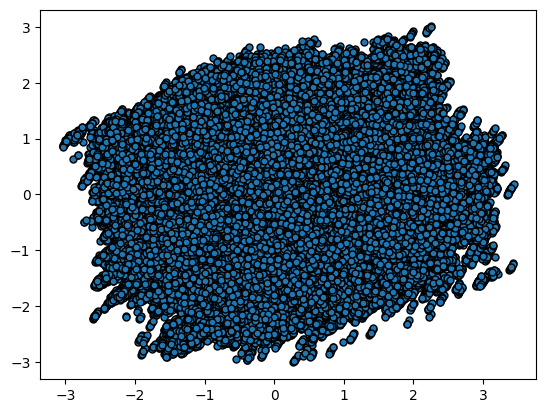

In [217]:
plt.scatter(Xreg_mypca[:,0], Xreg_mypca[:,1], s=25, edgecolors="k")

In [218]:
from sklearn.cluster import KMeans
from MyKMeans import MyKMeans

In [219]:
inertias = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i).fit(Xreg_mypca)
    inertias.append(kmeans.inertia_)

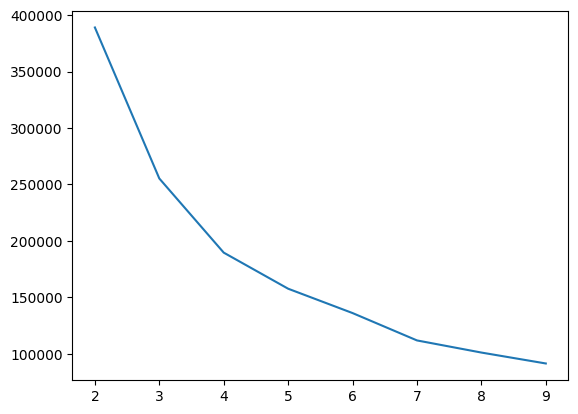

In [220]:
plt.plot(range(2, 10), inertias)

In [221]:
kmeans = MyKMeans(n_clusters=4).fit(Xreg_mypca)

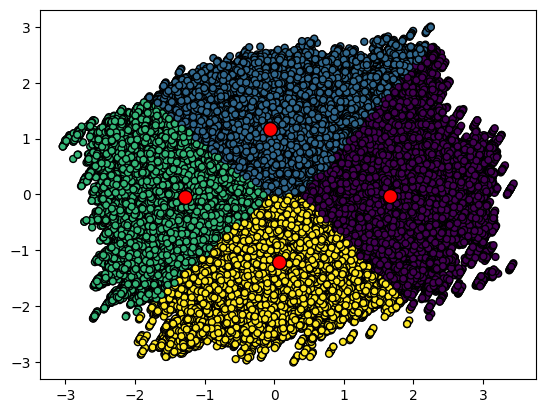

In [222]:
plt.scatter(Xreg_mypca[:,0], Xreg_mypca[:,1], c=kmeans.labels_, s=25, edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="red", edgecolors="k")

In [223]:
clustered_data = pd.concat([df_cl, pd.DataFrame(kmeans.labels_, columns=["Cluster"])], axis=1)

In [224]:
clustered_data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Cluster
0,305.0,3036.0,144.0,58.0,4.0,1195.0,131.0,0.0,2.0
1,298.0,315.0,84.0,218.0,7.0,707.0,145.0,0.0,1.0
2,219.0,6673.0,265.0,204.0,5.0,499.0,42.0,1.0,2.0
3,303.0,3668.0,229.0,218.0,2.0,810.0,70.0,1.0,2.0
4,17.0,623.0,162.0,226.0,5.0,985.0,143.0,0.0,0.0


In [225]:
clustered_data.groupby('Cluster').apply(lambda x: x.mode().iloc[0])

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Cluster
Cluster,,,,,,,,,
0.0,303.0,9.0,19.0,19.0,4.0,360.0,80.0,0.0,0.0
1.0,303.0,491.0,19.0,19.0,4.0,360.0,80.0,0.0,1.0
2.0,303.0,5.0,19.0,19.0,4.0,360.0,80.0,0.0,2.0
3.0,303.0,366.0,19.0,19.0,4.0,360.0,80.0,0.0,3.0


## Вывод: алгоритм кластеризации разделил данные по номеру рейса. С этими данными достаточно трудно давать интерпретацию

In [226]:
clustered_data.groupby('Cluster').median()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
Cluster,,,,,,,,
0.0,214.0,2011.5,161.0,157.0,4.0,790.0,110.0,0.0
1.0,214.0,2022.0,158.0,157.0,4.0,789.0,110.0,0.0
2.0,214.0,2001.0,159.0,157.0,4.0,788.0,110.0,0.0
3.0,214.0,2051.0,157.0,157.0,4.0,790.0,110.0,0.0


## Вывод: на этих датасетах лучше всего работают методы отбора признков (RFE). Это можно также понять из практической точки зрения. Например, для датасета регрессии понятно, что можно оставить признак дистанции, и в основном только он и будет влиять на длительность поездки. А при выделении признаков этот очень важный признак преобразуется в менее подходящий